In [60]:
import geopandas as gp

In [61]:
hd_difference = gp.read_file("inputs/Heidelberg_difference.json")
hd_difference = hd_difference.loc[hd_difference.difference_self17 != 0]
hd_difference = hd_difference.loc[hd_difference.pop_density > 5]
hd_difference.head()

,id,index,pop_density,population,difference_self0,difference_self1,difference_self2,difference_self3,difference_self4,difference_self5,...,difference_self15,difference_self16,difference_self17,difference_self18,difference_self19,difference_self20,difference_self21,difference_self22,difference_self23,geometry
17,891fae6d96fffff,10511,6.312654,0.613060,0.20985,0.0,0.205567,3.014989,8.585401,22.007992,...,20.634935,23.259643,19.846507,20.694882,20.914401,31.284542,27.567751,29.167873,25.997967,"POLYGON ((8.61591 49.37711, 8.61838 49.37652, ..."
23,891faad6307ffff,12532,45.991779,4.470683,0.00000,0.0,1.696226,5.210158,26.239957,17.239819,...,13.911072,14.162445,14.653369,14.397285,15.485158,16.661985,17.827553,18.586850,20.685714,"POLYGON ((8.68763 49.35801, 8.68764 49.35797, ..."
24,891faad6333ffff,12461,19.116779,1.858322,0.00000,0.0,1.617702,5.148601,27.018398,17.027928,...,14.219723,14.251948,14.904134,14.619430,15.659007,16.997214,18.522445,18.869691,20.758275,"POLYGON ((8.68763 49.35801, 8.68987 49.35909, ..."
37,891faad6ecfffff,12336,18.971403,1.844350,0.00000,0.0,0.895636,4.024299,23.723881,18.305785,...,19.212556,19.102262,17.695177,17.726761,17.795741,18.344294,22.750249,19.710204,20.261759,"POLYGON ((8.70398 49.36054, 8.70645 49.35994, ..."
40,891faad6ec3ffff,12187,8.374638,0.814106,0.00000,0.0,1.455535,4.031469,19.804393,14.539234,...,15.103571,14.417857,15.225719,15.236499,15.699321,15.144914,17.850541,18.931382,18.674562,"POLYGON ((8.70129 49.36283, 8.70376 49.36223, ..."


In [62]:
hd_difference.explore(column='difference_self17', cmap='magma_r')

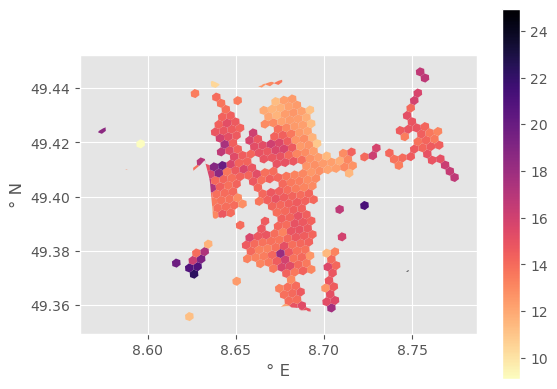

In [63]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
ax = hd_difference.plot(column = 'difference_self17', cmap = 'magma_r', legend=True)
plt.xlabel(xlabel = '° E')
plt.ylabel(ylabel='° N')
plt.savefig("figures/Clean_Difference_Map17.svg", bbox_inches = "tight")

/tmp/ipykernel_4406/772485296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot["id"] = hd_difference["id"]


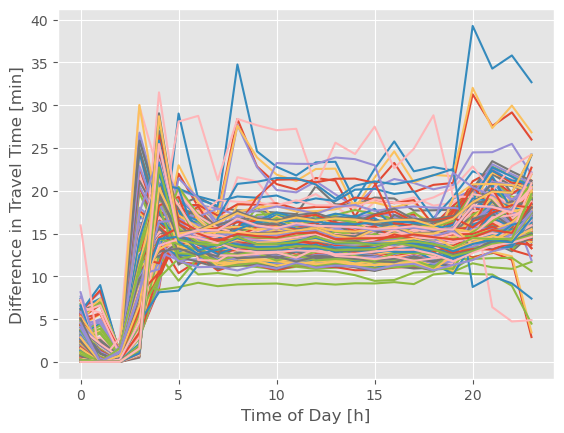

In [64]:

pivot = hd_difference.loc[:, hd_difference.columns.str.startswith("difference")]
pivot["id"] = hd_difference["id"]
plots = pivot.set_index("id").transpose().reset_index()
plots.plot(legend=False, xlabel="Time of Day [h]", ylabel="Difference in Travel Time [min]")
plt.savefig("figures/Clean_Heidelberg_Difference_MT.svg")

In [65]:
summary = pivot.describe()

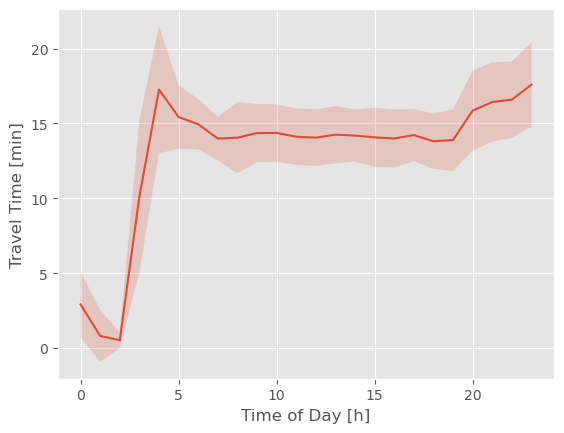

In [66]:
stats = summary.transpose().reset_index()
ax = stats["mean"].plot(legend= False, xlabel= "Time of Day [h]", ylabel="Travel Time [min]")
stats_upper = stats["mean"] + stats["std"]
stats_lower = stats["mean"] - stats['std']
ax.fill_between(stats.index, stats_lower, stats_upper, interpolate=True, alpha=0.2)
plt.savefig("figures/Clean_pd_summary_stats_all.svg", bbox_inches = "tight")

TODO: box plot für planning indicator, per district of heidelberg

In [67]:
boroughs = gp.read_file(filename="inputs/boroughs.json")
boroughs.head()

,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,geometry
0,49.415450,49.372224,8.768830,8.692388,139134533,relation,3283775,49.393824,8.721768,boundary,administrative,18,0.30001,city_district,Altstadt,"Altstadt, Heidelberg, Baden-Württemberg, 69117...","POLYGON ((8.69239 49.41191, 8.69333 49.40964, ..."
1,49.411332,49.396417,8.679977,8.641543,107771397,relation,3283776,49.404644,8.665469,boundary,administrative,18,0.30001,city_district,Bahnstadt,"Bahnstadt, Heidelberg, Baden-Württemberg, Germany","POLYGON ((8.64154 49.41130, 8.65239 49.40739, ..."
2,49.412318,49.404317,8.694012,8.656512,107005928,relation,3283777,49.408113,8.678280,boundary,administrative,18,0.30001,city_district,Bergheim,"Bergheim, Heidelberg, Baden-Württemberg, Germany","POLYGON ((8.65651 49.41105, 8.65886 49.41022, ..."
3,49.383825,49.366897,8.730404,8.700155,140246307,relation,3283778,49.375335,8.714003,boundary,administrative,18,0.30001,city_district,Boxberg,"Boxberg, Heidelberg, Baden-Württemberg, Germany","POLYGON ((8.70015 49.37283, 8.70030 49.37246, ..."
4,49.371833,49.355110,8.728942,8.699760,139336012,relation,3283779,49.363661,8.713632,boundary,administrative,18,0.30001,city_district,Emmertsgrund,"Emmertsgrund, Heidelberg, Baden-Württemberg, G...","POLYGON ((8.69976 49.36536, 8.69997 49.36319, ..."


In [68]:
cells_by_borough = hd_difference.sjoin(boroughs, how="left")
cells_by_borough.dropna(inplace=True)
cells_by_borough.head()

,id,index,pop_density,population,difference_self0,difference_self1,difference_self2,difference_self3,difference_self4,difference_self5,...,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
17,891fae6d96fffff,10511,6.312654,0.613060,0.20985,0.0,0.205567,3.014989,8.585401,22.007992,...,3283781.0,49.374638,8.640973,boundary,administrative,18.0,0.30001,city_district,Kirchheim,"Kirchheim, Heidelberg, Baden-Württemberg, 6912..."
24,891faad6333ffff,12461,19.116779,1.858322,0.00000,0.0,1.617702,5.148601,27.018398,17.027928,...,3283784.0,49.372645,8.687259,boundary,administrative,18.0,0.30001,city_district,Rohrbach,"Rohrbach, Heidelberg, Baden-Württemberg, 69126..."
37,891faad6ecfffff,12336,18.971403,1.844350,0.00000,0.0,0.895636,4.024299,23.723881,18.305785,...,3283779.0,49.363661,8.713632,boundary,administrative,18.0,0.30001,city_district,Emmertsgrund,"Emmertsgrund, Heidelberg, Baden-Württemberg, G..."
37,891faad6ecfffff,12336,18.971403,1.844350,0.00000,0.0,0.895636,4.024299,23.723881,18.305785,...,3283784.0,49.372645,8.687259,boundary,administrative,18.0,0.30001,city_district,Rohrbach,"Rohrbach, Heidelberg, Baden-Württemberg, 69126..."
40,891faad6ec3ffff,12187,8.374638,0.814106,0.00000,0.0,1.455535,4.031469,19.804393,14.539234,...,3283779.0,49.363661,8.713632,boundary,administrative,18.0,0.30001,city_district,Emmertsgrund,"Emmertsgrund, Heidelberg, Baden-Württemberg, G..."


In [69]:
mean_boroughs = cells_by_borough.groupby(["name"]).mean("difference_self17")
mean_boroughs

,index,pop_density,population,difference_self0,difference_self1,difference_self2,difference_self3,difference_self4,difference_self5,difference_self6,...,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_id,lat,lon,place_rank,importance
name,,,,,,,,,,,,,,,,,,,,,
Altstadt,5969.444444,27.866289,2.706426,3.778366,0.215046,0.458093,9.545996,13.470684,14.186159,13.677841,...,49.415450,49.372224,8.768830,8.692388,139134533.0,3283775.0,49.393824,8.721768,18.0,0.300010
Bahnstadt,6391.952381,26.971773,2.618984,3.412408,1.846694,0.149028,11.408441,15.519104,15.817392,15.461612,...,49.411332,49.396417,8.679977,8.641543,107771397.0,3283776.0,49.404644,8.665469,18.0,0.300010
Bergheim,5767.300000,34.179282,3.319011,4.042942,1.622509,0.107896,11.372494,15.065715,15.114567,14.764416,...,49.412318,49.404317,8.694012,8.656512,107005928.0,3283777.0,49.408113,8.678280,18.0,0.300010
Boxberg,10558.166667,19.298048,1.875521,1.184060,0.000000,0.448574,6.534604,15.955914,15.996520,17.330008,...,49.383825,49.366897,8.730404,8.700155,140246307.0,3283778.0,49.375335,8.714003,18.0,0.300010
Emmertsgrund,11839.250000,17.324806,1.684069,0.021135,0.000000,1.041282,4.866925,20.723169,16.037067,17.964176,...,49.371833,49.355110,8.728942,8.699760,139336012.0,3283779.0,49.363661,8.713632,18.0,0.300010
Handschuhsheim,2356.717391,25.815524,2.505879,1.940789,0.046042,1.201036,11.199541,18.073835,15.057020,14.478964,...,49.452420,49.416655,8.740485,8.646552,108052811.0,3283780.0,49.433930,8.692343,18.0,0.300010
Kirchheim,9756.725490,23.643643,2.296877,3.087064,0.047559,0.259617,9.096625,16.524012,16.020726,15.035858,...,49.397620,49.352003,8.678009,8.601004,107954990.0,3283781.0,49.374638,8.640973,18.0,0.300010
Neuenheim,4240.046512,30.286694,2.940599,3.557288,0.775537,0.563789,11.100517,14.009193,15.412129,14.832250,...,49.429302,49.410229,8.733888,8.655573,139726050.0,3283782.0,49.419713,8.701755,18.0,0.300010
Pfaffengrund,6723.250000,23.896420,2.320105,2.542607,2.422726,0.361727,11.892234,16.561542,15.246296,15.149951,...,49.414928,49.390766,8.671368,8.633025,139407102.0,3283783.0,49.397685,8.645710,18.0,0.267719


In [70]:
map = boroughs.merge(mean_boroughs, on="name", how = "inner", )
map.explore(column="difference_self17", cmap="magma_r")

<Axes: >

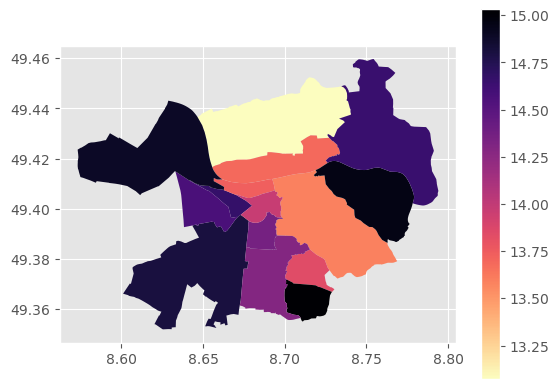

In [71]:
map.plot(column="difference_self17", cmap='magma_r', legend = True)

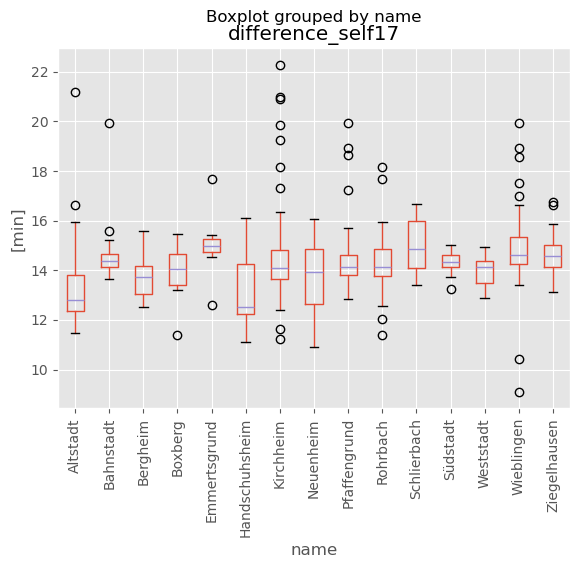

In [72]:
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
ax = cells_by_borough.boxplot(column="difference_self17", by= "name", ylabel = "[min]")
plt.xticks(rotation=90)
plt.savefig("figures/Clean_Boxplots_Difference.svg", bbox_inches = "tight")


<Axes: >

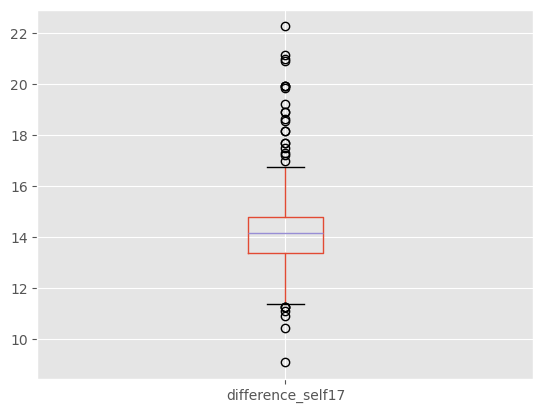

In [73]:
cells_by_borough.boxplot("difference_self17")

In [74]:
pivot = mean_boroughs.loc[:, mean_boroughs.columns.str.startswith("difference")]
pivot = pivot.rename(columns=lambda x: x.strip("difference_self"))
pivot = pivot.transpose()
#pivot = pivot.transpose()
pivot.head()


name,Altstadt,Bahnstadt,Bergheim,Boxberg,Emmertsgrund,Handschuhsheim,Kirchheim,Neuenheim,Pfaffengrund,Rohrbach,Schlierbach,Südstadt,Weststadt,Wieblingen,Ziegelhausen
0,3.778366,3.412408,4.042942,1.184060,0.021135,1.940789,3.087064,3.557288,2.542607,3.595473,0.806930,4.601742,4.749900,4.372700,0.301695
1,0.215046,1.846694,1.622509,0.000000,0.000000,0.046042,0.047559,0.775537,2.422726,0.045284,0.000000,0.134401,0.926482,2.944762,0.000000
2,0.458093,0.149028,0.107896,0.448574,1.041282,1.201036,0.259617,0.563789,0.361727,0.627598,0.231568,0.036206,0.017392,0.877714,0.059595
3,9.545996,11.408441,11.372494,6.534604,4.866925,11.199541,9.096625,11.100517,11.892234,9.366638,2.827083,10.552671,11.181800,18.361054,1.546456
4,13.470684,15.519104,15.065715,15.955914,20.723169,18.073835,16.524012,14.009193,16.561542,19.048023,22.732340,14.148001,14.039732,16.006006,24.099152


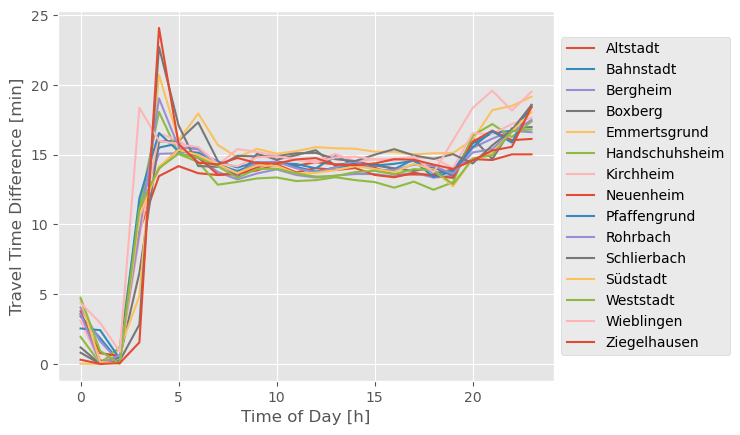

In [75]:
ax = pivot.plot(legend = False, xlabel = "Time of Day [h]", ylabel= "Travel Time Difference [min]")
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.savefig("figures/test.svg", bbox_inches = "tight")

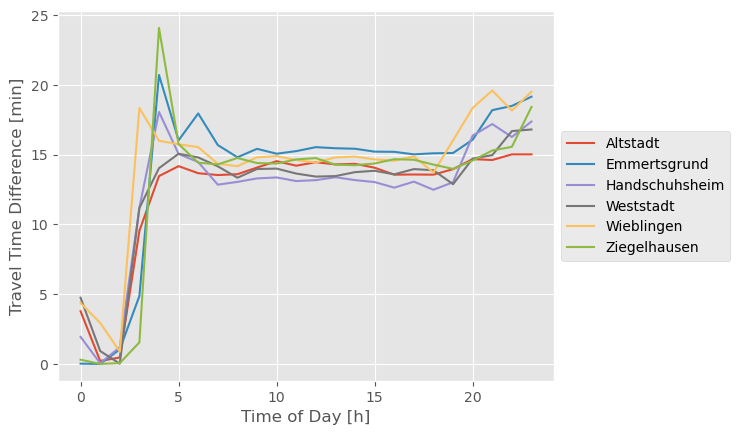

In [76]:
ax2 = pivot[["Altstadt", "Emmertsgrund", "Handschuhsheim", "Weststadt", "Wieblingen", "Ziegelhausen"]].plot(legend = False, xlabel = "Time of Day [h]", ylabel= "Travel Time Difference [min]")
ax2.legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.savefig("figures/clean_select_HD_DI_boroughs.svg", bbox_inches = "tight")